#Conversión con Programación clasica/regular




In [ ]:
#creamos una funcion para convertir
def f_conv_cels_fah (p_celsius):
  fah= p_celsius*1.8 + 32
  return fah

print('50° Celsius= ',
      f_conv_cels_fah(50),
      '° Fahrenheit ')

50° Celsius=  122.0 ° Fahrenheit 


*  pero y si no conocemos las reglas?
*  y si no es la logica es muy compleja o peor es muy variable?


#Conversión con IA 


##P1. importando librerias.

In [21]:
from google.colab import files
datos = files.upload()

Saving C_a_F.csv to C_a_F (1).csv


In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(datos['C_a_F.csv']), encoding='utf-8')
data.head(10)

,Celsius,Faren
0,-126,"-194,8"
1,-114,"-173,2"
2,254,"489,2"
3,-199,"-326,2"
4,-159,"-254,2"
5,82,"179,6"
6,-87,"-124,6"
7,185,365
8,-263,"-441,4"
9,-12,"10,4"


##Definiendo los parametros de entrada y salida (capas)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Celsius  600 non-null    int64 
 1   Faren    600 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


In [30]:
c = data.drop('Faren', axis=1)
f = data.drop('Celsius', axis=1)

In [31]:
c['Celsius'] = c['Celsius'].astype(float)

In [32]:
f = f['Faren'].replace(',', '.', regex=True).astype(float)

##P3. Creando la red neuronal

In [33]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

###P3.1 Compilamos la red


In [34]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
)

##P4.Entrenando

In [35]:
print("Comenzando entrenamiento...")
historial = modelo.fit(c, f, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


###P4.1 Resultados del entrenamiento

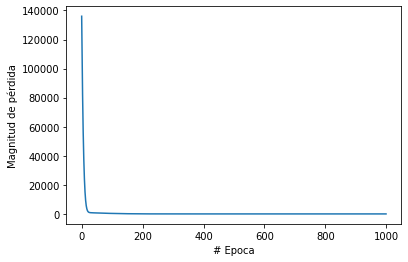

In [36]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])
plt.show()

##P5. Haciendo una predicción

In [37]:
v_celsius= 50
print("Hagamos una predicción!")
resul_IA   = modelo.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  50 ° = Fahrenheit: 
IA:  [[122.000015]] 
Regular:  122.0 
Dif %: [[-1.5258789e-05]]


##P6. Conociendo que sesgos y pesos resultantes


---
Una vez termina de entrenar las neuronas quedan con pesos y sesgos 




In [39]:
print("Variables internas del modelo")
print('peso: ',capa.get_weights()[0])
print('sesgo: ',capa.get_weights()[1])

Variables internas del modelo
peso:  [[1.8000004]]
sesgo:  [31.999996]


##P7. Utilizando más capas

###P7.1 Creamos un modelo con dos capas ocultas

In [40]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])  # capa DENSA con 3 neuronas y el entra información de 1 capa
oculta2 = tf.keras.layers.Dense(units=3)                   # capa DENSA con 3 neuronas
salida  = tf.keras.layers.Dense(units=1)                    # capa de salida con 1 neurona
#creamos el modelo con las 4 capas (recuerden 1 que la de la parametros no hace falta definirla)
modelo_v2 = tf.keras.Sequential([oculta1, oculta2, salida])

In [41]:
# compilamos
modelo_v2.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
)

In [42]:
#entrenamos
print("Comenzando entrenamiento...")
historial_V2 = modelo_v2.fit(c, f, epochs=1000, verbose=True)
print("modelo_v2 entrenado!")

Comenzando entrenamiento...
Epoch 1/1000
19/19 [==============================] - 0s 1ms/step - loss: 29672.2637
Epoch 2/1000
19/19 [==============================] - 0s 2ms/step - loss: 2434.7559
Epoch 3/1000
19/19 [==============================] - 0s 1ms/step - loss: 1183.1830
Epoch 4/1000
19/19 [==============================] - 0s 1ms/step - loss: 943.2034
Epoch 5/1000
19/19 [==============================] - 0s 1ms/step - loss: 870.7093
Epoch 6/1000
19/19 [==============================] - 0s 2ms/step - loss: 801.8314
Epoch 7/1000
19/19 [==============================] - 0s 1ms/step - loss: 756.4120
Epoch 8/1000
19/19 [==============================] - 0s 1ms/step - loss: 721.6500
Epoch 9/1000
19/19 [==============================] - 0s 1ms/step - loss: 681.5335
Epoch 10/1000
19/19 [==============================] - 0s 1ms/step - loss: 644.9543
Epoch 11/1000
19/19 [==============================] - 0s 1ms/step - loss: 608.0875
Epoch 12/1000
19/19 [==============================] 

###P7.2 resultados del entrenamiento

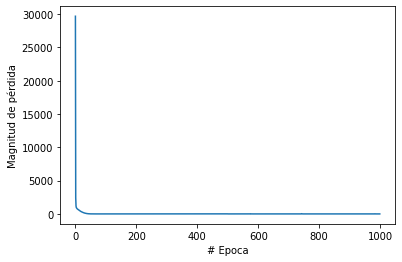

In [44]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_V2.history["loss"])


###P7.3. conociendo que sesgos y pesos resultantes


---
Una vez termina de entrenar las neuronas quedan con pesos y sesgos 


In [45]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[0.53237504, 1.1074394 , 0.8018592 ]], dtype=float32), array([6.942723 , 6.5107203, 6.660383 ], dtype=float32)]
[array([[ 0.13975944,  0.2549816 , -0.4492573 ],
       [ 0.2882117 ,  0.5460083 , -0.221827  ],
       [ 1.112036  ,  0.3716594 , -0.45002648]], dtype=float32), array([ 6.6146903,  6.435211 , -6.3732767], dtype=float32)]
[array([[ 0.4198774 ],
       [ 0.55819803],
       [-0.8048899 ]], dtype=float32), array([5.755813], dtype=float32)]


###P7.4. hagamos una predicción

In [47]:
v_celsius= 356
print("Hagamos una predicción!")
resul_IA   = modelo_v2.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  356 ° = Fahrenheit: 
IA:  [[672.8]] 
Regular:  672.8000000000001 
Dif %: [[0.]]


In [48]:
v_fahrenheit= 40
print("Hagamos una predicción!")
resul_IA   = modelo_v2.predict([v_fahrenheit])
result_real= f_conv_fah_cels(v_fahrenheit)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_fahrenheit, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!


NameError: ignored